In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from dbscan_cluster import run_dbscan
from cluster_utils import cluster_plot, cluster_plot_galactic
import json

from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u
from simbad_download import resolve_name
from uncertainties import unumpy, ufloat
from sklearn.preprocessing import StandardScaler

In [7]:
CLUSTER_NAME: str = 'King 11'

In [8]:
gaiadr3 = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}.csv')
normalized = np.loadtxt(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_normalized.dat')
uncert = np.loadtxt(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_normalized_uncert.dat')
normalized_cp = np.loadtxt(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_normalized_cp.dat')
uncert_cp = np.loadtxt(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_normalized_cp_uncert.dat')
lit = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_literature.csv')

In [9]:
lit_dr3 = pd.merge(left=lit[['EDR3 id', 'reported', 'TIC']], right=gaiadr3, left_on='EDR3 id', right_on='source_id', how='inner')

In [10]:
cp_ra, cp_dec, cp_par, cp_pmra, cp_pmdec, cp_radvel = resolve_name(CLUSTER_NAME)

In [11]:
galactic_coords = SkyCoord(ra=cp_ra*u.deg, dec=cp_dec*u.deg,
                           pm_ra_cosdec=cp_pmra*u.mas/u.year, frame=ICRS,
                           pm_dec=cp_pmdec*u.mas/u.year).galactic

In [12]:
galactic_coords

<SkyCoord (Galactic): (l, b) in deg
    (117.15039535, 6.48328308)
 (pm_l_cosb, pm_b) in mas / yr
    (-3.41296441, 0.20319192)>

# Plain DBSCAN

In [17]:
clustered, noise, found, not_found = run_dbscan(normalized, gaiadr3, lit_dr3, 0.2, 2, False)

Classified into 167 labels.
Clustered: 94/110
94/110 sources from literature clustered
396 clustered sources.


In [19]:
clustered_sets = []
noise_sets = []
found_sets = []
not_found_sets = []

for _ in range(100):
    normalized_u = normalized + np.random.normal(scale=np.abs(uncert), size=normalized.shape)
    clustered, noise, found, not_found = run_dbscan(normalized_u, gaiadr3, lit_dr3, 0.3, 2, False)
    clustered_sets.append(clustered)
    noise_sets.append(noise)
    found_sets.append(found)
    not_found_sets.append(not_found)

Classified into 195 labels.
Clustered: 92/110
92/110 sources from literature clustered
299 clustered sources.
Classified into 199 labels.
Clustered: 98/110
98/110 sources from literature clustered
257 clustered sources.
Classified into 209 labels.
Clustered: 99/110
99/110 sources from literature clustered
301 clustered sources.
Classified into 207 labels.
Clustered: 88/110
88/110 sources from literature clustered
246 clustered sources.
Classified into 197 labels.
Clustered: 91/110
91/110 sources from literature clustered
283 clustered sources.
Classified into 194 labels.
Clustered: 90/110
90/110 sources from literature clustered
255 clustered sources.
Classified into 201 labels.
Clustered: 89/110
89/110 sources from literature clustered
263 clustered sources.
Classified into 229 labels.
Clustered: 85/110
85/110 sources from literature clustered
253 clustered sources.
Classified into 189 labels.
Clustered: 89/110
89/110 sources from literature clustered
259 clustered sources.
Classified

Clustered: 81/110
81/110 sources from literature clustered
230 clustered sources.
Classified into 185 labels.
Clustered: 90/110
90/110 sources from literature clustered
296 clustered sources.
Classified into 206 labels.
Clustered: 91/110
91/110 sources from literature clustered
265 clustered sources.
Classified into 212 labels.
Clustered: 95/110
95/110 sources from literature clustered
259 clustered sources.
Classified into 190 labels.
Clustered: 89/110
89/110 sources from literature clustered
258 clustered sources.
Classified into 212 labels.
Clustered: 95/110
95/110 sources from literature clustered
279 clustered sources.
Classified into 199 labels.
Clustered: 94/110
94/110 sources from literature clustered
291 clustered sources.
Classified into 207 labels.
Clustered: 87/110
87/110 sources from literature clustered
268 clustered sources.
Classified into 227 labels.
Clustered: 92/110
92/110 sources from literature clustered
291 clustered sources.
Classified into 222 labels.
Clustered:

In [20]:
clustered = pd.concat(clustered_sets).drop_duplicates(subset=['source_id'])
len(clustered)

921

In [21]:
found = pd.concat(found_sets).drop_duplicates(subset=['source_id'])
len(found)

110

In [22]:
not_found = pd.concat(not_found_sets).drop_duplicates(subset=['source_id'])
len(not_found)

77

In [23]:
clustered.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label
26,1636148068921376768,Gaia DR3 2214128075718113408,2214128075718113408,1202723154,2016.0,-3.664611,0.117864,68.621653,0.118066,0.274683,...,3.245528,2.036999,1.205188,0.777591,0.644632,0.031031,3.558915,1.098779,0.128335,1
42,1636148068921376768,Gaia DR3 2214128384954802176,2214128384954802176,1797475658,2016.0,-3.400607,0.019176,68.607616,0.022509,0.293627,...,3.797841,2.383649,1.410283,0.909918,1.011096,0.002842,0.061857,0.184957,0.162418,1
52,1636148068921376768,Gaia DR3 2214128522394752512,2214128522394752512,1381386726,2016.0,-3.299702,0.071153,68.635789,0.073094,0.375539,...,3.680382,2.309928,1.366666,0.881776,0.992557,0.020631,3.130102,0.492188,0.151545,1
53,1636148068921376768,Gaia DR3 2214128552452820096,2214128552452820096,472368864,2016.0,-3.366423,0.019527,68.627336,0.020311,0.260835,...,3.797841,2.383649,1.410283,0.909918,1.00277,0.002911,-0.362961,0.196506,0.162326,1
63,1636148068921376768,Gaia DR3 2214128762911912576,2214128762911912576,1623482920,2016.0,-3.351795,0.092017,68.643422,0.095037,0.393032,...,3.797841,2.383649,1.410283,0.909918,0.746351,0.0328,3.626712,0.614355,0.134277,1


In [24]:
occurences = clustered['source_id'].apply(lambda x:
                                          sum([len(np.intersect1d(cs.source_id.values, [x])) for cs in clustered_sets]))

In [25]:
found['occurences'] = found['source_id'].apply(lambda x:
                                          sum([len(np.intersect1d(cs.source_id.values, [x])) for cs in found_sets]))/100.0

In [26]:
not_found['occurences'] = 1.0-not_found['source_id'].apply(lambda x:
                                                       sum([len(np.intersect1d(cs.source_id.values, [x])) for cs in not_found_sets]))/100.0

In [27]:
clustered['occurences'] = occurences/100.0
clustered.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences
26,1636148068921376768,Gaia DR3 2214128075718113408,2214128075718113408,1202723154,2016.0,-3.664611,0.117864,68.621653,0.118066,0.274683,...,2.036999,1.205188,0.777591,0.644632,0.031031,3.558915,1.098779,0.128335,1,0.04
42,1636148068921376768,Gaia DR3 2214128384954802176,2214128384954802176,1797475658,2016.0,-3.400607,0.019176,68.607616,0.022509,0.293627,...,2.383649,1.410283,0.909918,1.011096,0.002842,0.061857,0.184957,0.162418,1,0.92
52,1636148068921376768,Gaia DR3 2214128522394752512,2214128522394752512,1381386726,2016.0,-3.299702,0.071153,68.635789,0.073094,0.375539,...,2.309928,1.366666,0.881776,0.992557,0.020631,3.130102,0.492188,0.151545,1,0.56
53,1636148068921376768,Gaia DR3 2214128552452820096,2214128552452820096,472368864,2016.0,-3.366423,0.019527,68.627336,0.020311,0.260835,...,2.383649,1.410283,0.909918,1.00277,0.002911,-0.362961,0.196506,0.162326,1,0.91
63,1636148068921376768,Gaia DR3 2214128762911912576,2214128762911912576,1623482920,2016.0,-3.351795,0.092017,68.643422,0.095037,0.393032,...,2.383649,1.410283,0.909918,0.746351,0.0328,3.626712,0.614355,0.134277,1,0.34


In [28]:
cp_coords = SkyCoord(ra=cp_ra*u.deg, dec=cp_dec*u.deg, frame=ICRS)
cp_ra = cp_coords.ra.wrap_at(180*u.deg).value

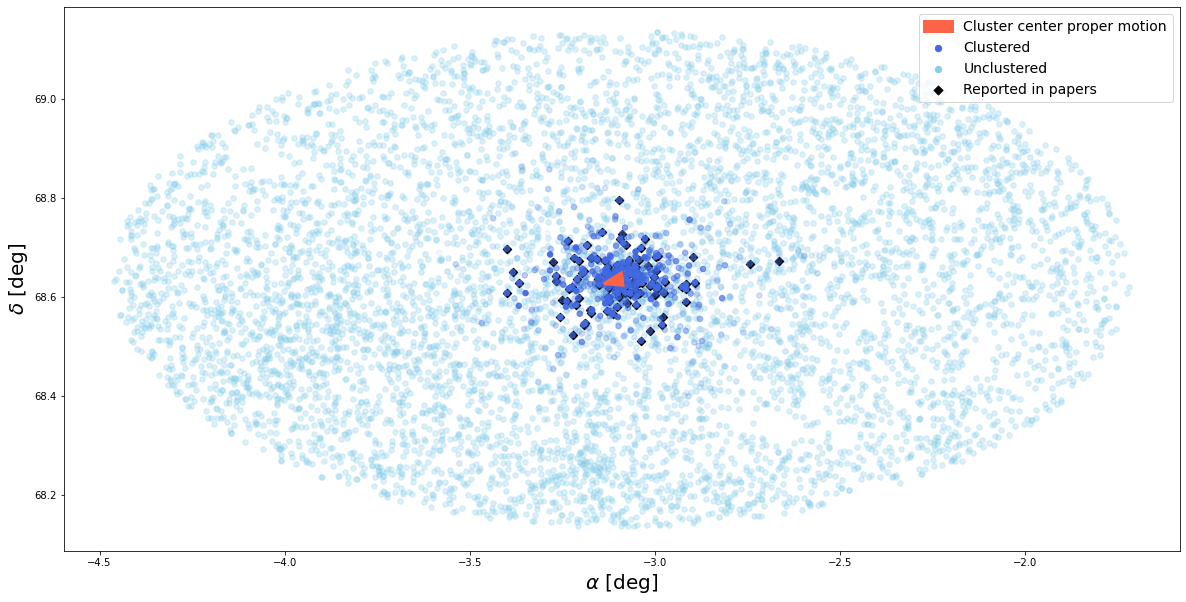

In [30]:
plt.figure(figsize=(20, 10))
plt.scatter(clustered.ra, clustered.dec, 
            color='royalblue', alpha=clustered.occurences, label='Clustered', zorder=2, s=30.)
plt.scatter(noise.ra, noise.dec, color='skyblue', label='Unclustered', zorder=1, s=30., alpha=.3)
plt.scatter(lit_dr3.ra, lit_dr3.dec, color='black', zorder=1,
            marker='D', label='Reported in papers')

plt.gca().set_xlabel('$\\alpha$ [deg]', fontsize=20);
plt.gca().set_ylabel('$\delta$ [deg]', fontsize=20);


plt.arrow(cp_ra,
          cp_dec,
          cp_pmra*(u.arcsec/u.year).to(u.deg/u.year),
          cp_pmdec*(u.arcsec/u.year).to(u.deg/u.year),
          linewidth=3.,
          color='tomato',
          head_width=0.025,
          head_length=0.05,
          zorder=4, label='Cluster center proper motion')

lgnd = plt.legend(fontsize=14, loc='upper right');
for handle in lgnd.legendHandles:
    handle._sizes = [40];
    handle._alpha = 1.;

In [31]:
clustered.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
not_found.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_not_found.csv')

# Convergent velocities

In [13]:
with open(f'optuna_db/{CLUSTER_NAME}/{CLUSTER_NAME.replace(" ", "_")}_cp_best_params.json', 'r') as f:
    best_params = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'optuna_db/NGC 188/NGC_188_cp_best_params.json'

In [ ]:
best_params

In [28]:
clustered, noise, found, not_found = run_dbscan(normalized_cp, gaiadr3, lit_dr3, 0.025, 25, False)

Classified into 51 labels.
Clustered: 724/957
724/957 sources from literature clustered
1384 clustered sources.


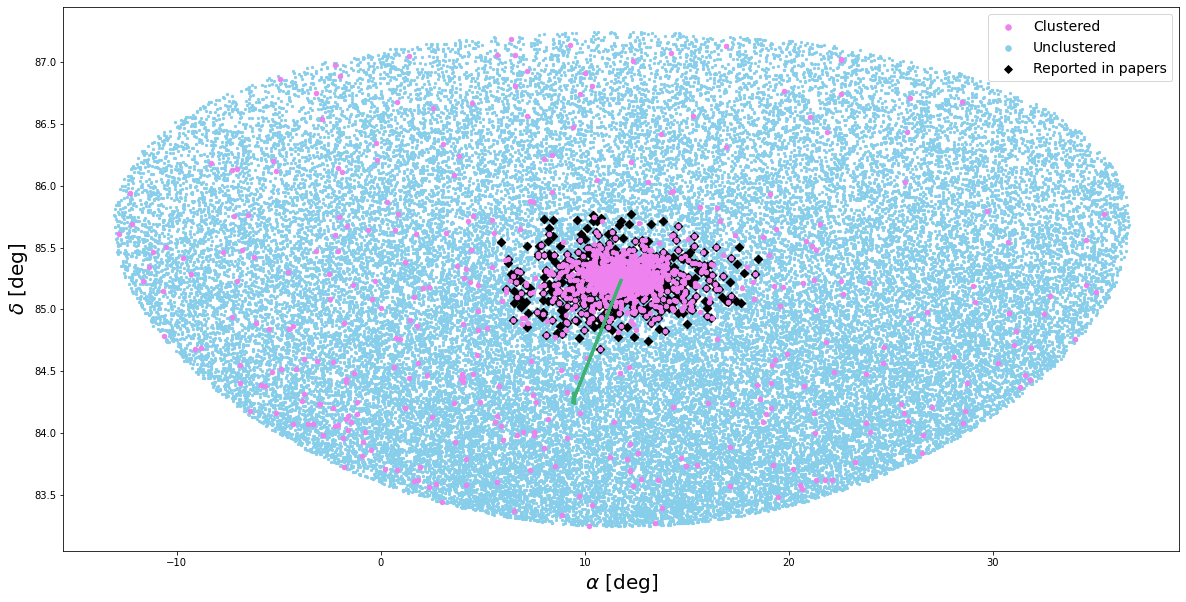

In [29]:
cluster_plot(clustered, gaiadr3, lit_dr3)
plt.arrow(cp_ra,
          cp_dec,
          cp_pmra,
          cp_pmdec,
          linewidth=3.,
          color='mediumseagreen',
          head_width=0.1,
          head_length=0.1,
          zorder=4)

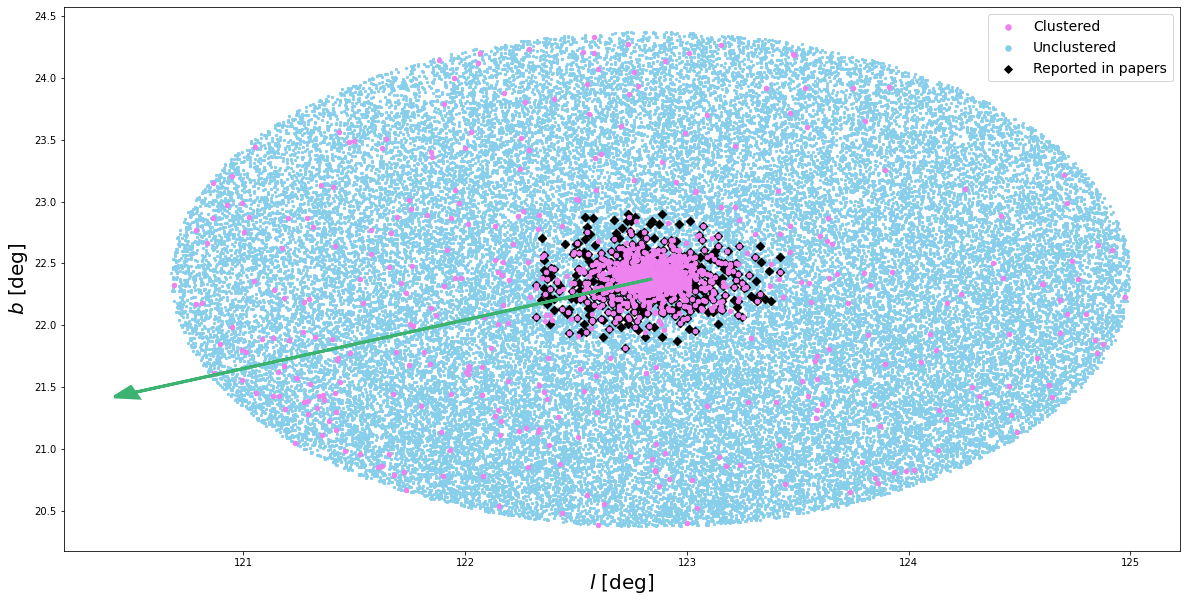

In [30]:
cluster_plot_galactic(clustered, gaiadr3, lit_dr3)
plt.arrow(galactic_coords.l.value,
          galactic_coords.b.value,
          galactic_coords.pm_l_cosb.value,
          galactic_coords.pm_b.value,
          linewidth=3.,
          color='mediumseagreen',
          head_width=0.1,
          head_length=0.1,
          zorder=4)

In [ ]:
a = np.loadtxt('Trumpler 5_isochrone.dat', usecols=(28, 29, 30))

In [ ]:
plt.plot(a[:-1, 1]-a[:-1, 2], a[:-1, 0])
plt.gca().invert_yaxis();